# Classificação: Aprendendo a classificar dados com Machine Learning

## Importar dados

In [1]:
import pandas as pd

In [2]:
CSV_URL = 'https://caelum-online-public.s3.amazonaws.com/3067-classificacao/Projeto/dados/marketing_investimento.csv'

In [4]:
df_investimentos = pd.read_csv(CSV_URL)
df_investimentos.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


## EDA

In [6]:
import plotly.express as px

In [5]:
df_investimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [7]:
px.histogram(df_investimentos,
             x='aderencia_investimento',
             text_auto=True)

In [9]:
px.histogram(df_investimentos,
             x='estado_civil',
             text_auto=True,
             # barmode='group',
             color='aderencia_investimento')

In [11]:
px.histogram(df_investimentos,
             x='escolaridade',
             text_auto=True,
             color='aderencia_investimento')

In [16]:
px.histogram(df_investimentos,
             x='inadimplencia',
             text_auto=True,
             color='aderencia_investimento')

In [13]:
px.histogram(df_investimentos,
             x='fez_emprestimo',
             text_auto=True,
             color='aderencia_investimento')

In [18]:
px.box(df_investimentos,
       x='idade',
       color='aderencia_investimento')

In [19]:
px.box(df_investimentos,
       x='saldo',
       color='aderencia_investimento')

In [20]:
px.box(df_investimentos,
       x='tempo_ult_contato',
       color='aderencia_investimento')

In [21]:
px.box(df_investimentos,
       x='numero_contatos',
       color='aderencia_investimento')

## Transformação dos dados

In [22]:
X = df_investimentos.drop('aderencia_investimento', axis=1)

In [23]:
Y = df_investimentos['aderencia_investimento'].copy()

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
columns = X.columns

In [27]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    [
        'estado_civil',
        'escolaridade',
        'inadimplencia',
        'fez_emprestimo'
    ]),
    remainder='passthrough',
    sparse_threshold=0
)

In [28]:
X = one_hot.fit_transform(X)

In [30]:
one_hot.get_feature_names_out(columns)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [31]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columns))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()

In [34]:
Y = label_encoder.fit_transform(Y)

## Modeling

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=.25,
    stratify=Y,
    random_state=0
)

In [38]:
from sklearn.dummy import DummyClassifier

In [40]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test)

0.6056782334384858

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
model_tree.score(x_test, y_test)

0.6845425867507886

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [47]:
features_names = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

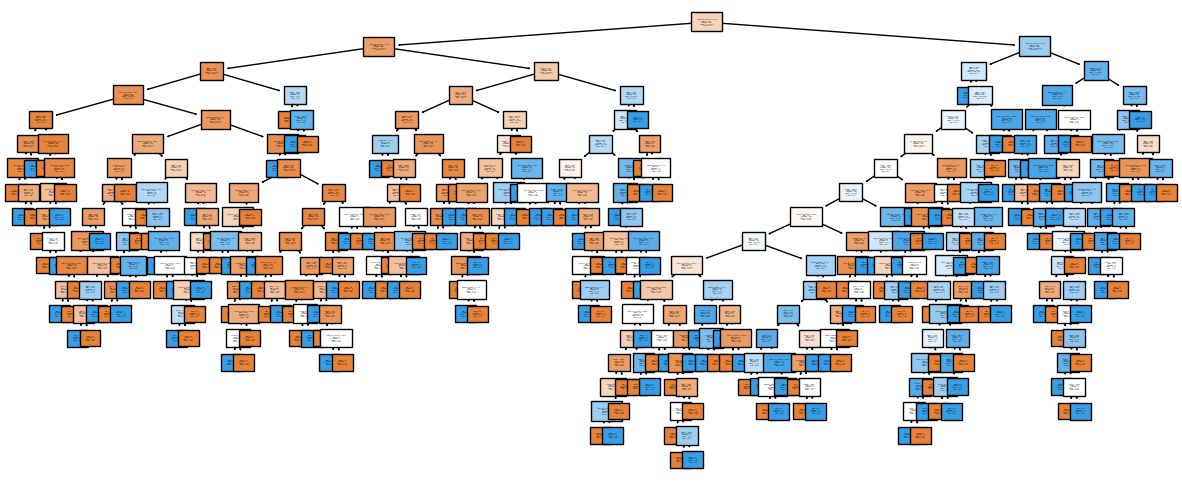

In [50]:
plt.figure(figsize=(15, 6))
plot_tree(model_tree,
          filled=True,
          class_names=['Sim', 'Não'],
          fontsize=1,
          feature_names=features_names);

In [51]:
print('Accr: Treino', model_tree.score(x_train, y_train))
print('Accr: Test', model_tree.score(x_test, y_test))

Accr: Treino 1.0
Accr: Test 0.6845425867507886


In [52]:
model_tree = DecisionTreeClassifier(max_depth=3,
                                    random_state=0)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
print('Accr: Treino', model_tree.score(x_train, y_train))
print('Accr: Test', model_tree.score(x_test, y_test))

Accr: Treino 0.7665615141955836
Accr: Test 0.6908517350157729


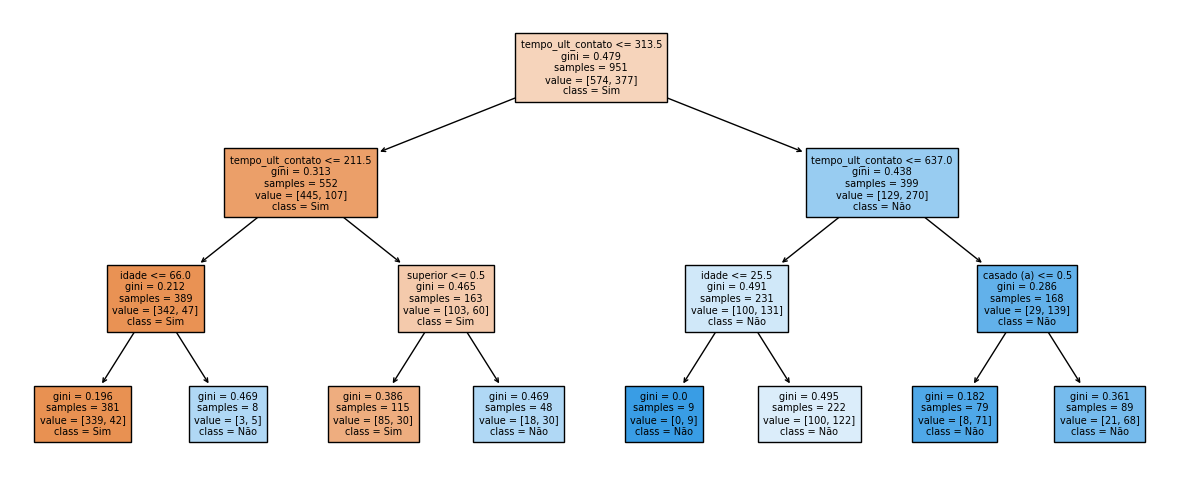

In [55]:
plt.figure(figsize=(15, 6))
plot_tree(model_tree,
          filled=True,
          class_names=['Sim', 'Não'],
          fontsize=7,
          feature_names=features_names);

### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [58]:
normalizer = MinMaxScaler()
x_train_normalize = normalizer.fit_transform(x_train)

In [59]:
pd.DataFrame(x_train_normalize)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.455882,0.063363,0.025828,0.096774
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.529412,0.050939,0.056291,0.064516
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.220588,0.097441,0.144371,0.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.048135,0.048344,0.032258
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,0.190054,0.102980,0.064516
...,...,...,...,...,...,...,...,...,...,...,...,...
946,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.588235,0.048596,0.151987,0.000000
947,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.426471,0.125519,0.003311,0.000000
948,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.626034,0.063576,0.064516
949,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.529412,0.031877,0.256954,0.000000


In [61]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_normalize, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
model_knn.score(normalizer.transform(x_test),
                y_test)

0.668769716088328

## Escolhendo o modelo

In [66]:
print('Dummy', dummy.score(x_test, y_test))
print('Tree', model_tree.score(x_test, y_test))
print('Knn', model_knn.score(normalizer.transform(x_test), y_test))

Dummy 0.6056782334384858
Tree 0.6908517350157729
Knn 0.668769716088328


### Salvando o modelo

In [67]:
import pickle

In [68]:
with open('one_hot.pkl', 'wb') as arq:
  pickle.dump(one_hot, arq)

In [69]:
with open('tree.pkl', 'wb') as arq:
  pickle.dump(model_tree, arq)

### Testando nova previsão

In [70]:
predicao = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [71]:
one_hot_pkl = pd.read_pickle('one_hot.pkl')
tree_pkl = pd.read_pickle('tree.pkl')

In [74]:
tree_pkl.predict(
    one_hot_pkl.transform(
        pd.DataFrame(predicao)
    )
)

array([1])